<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.977 · Anàlisis de sentiments i textos</p>
<p style="margin: 0; text-align:right;">Màster Universitari de Ciencia de Dades(Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicacions</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

**Pràctica realitzada per: Núria Aguilera i Joaquim Quadrada, 16/06/2023**

# PRA 3: Deep Learning per a l'anàlisi de textos

En aquesta pràctica revisarem i aplicarem els coneixements apresos durant el curs i, en més detall, en els darrers mòduls. En concret tractarem els temes següents:

1. **Traducció automàtica**: amb custom embeddings i amb embeddings preentrenats.
2. **Classificació de frases**: Aplicació dels conceptes ja treballats per a la reutilització de l'arquitectura de dos models.

3. **Detecció de NER i NEL**: detecció i classificació d'entitats nomenades (NER) i entity linking basant-nos en els temes ja treballats als notebooks de NER i NEL i afegint-hi un exemple senzill de transformers.

També incloem altres temes transversals treballats al llarg de l'assignatura.

# PART 1

En aquesta primera part de la pràctica es demana resoldre els exercicis usant la llibreria **KERAS**.

# 1. Traducció Automàtica (4 punts)

## 1.1 TA amb Custom Embeddings (2 punts)

L'objectiu d'aquest apartat és entrenar un model de traducció automàtica entre anglès i holandès, seguint els mateixos passos que al notebook de Machine Translation.

<strong>Implementació:</strong> Seguint els passos treballats al notebook de traducció automàtica, implementar i entrenar un model de traducció automàtica, de l'anglès al holandès. <br>
    - La capa embedding deu tenir una dimensió igual a 300 <br>
    - Es recomana una longitud màxima de seqüència de 12 <br>
 <br>

Mostreu l'aplicació del model entrenat amb algun exemple.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 60.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


Primer haureu de carregar les dades proporcionades, que trobareu al fitxer mt/nld.txt

In [4]:
#############################################
# Carreguem les dades proporcionades del fitxer nld.txt
from numpy import array

def to_lines(text):
    sents = text.strip().split('\n')
    sents = [i.split('\t')[:2] for i in sents]
    return sents

try:
  file = open('/content/nld.txt', mode='rt', encoding='utf-8')
except:
  file = open('/content/drive/MyDrive/nld.txt', mode='rt', encoding='utf-8')

text = file.read()
file.close()

eng_dutch = to_lines(text)
eng_dutch = array(eng_dutch)

eng_dutch = eng_dutch[:60000,:]
print(eng_dutch)
#############################################


[['Go.' 'Lopen!']
 ['Go.' 'Vooruit.']
 ['Hi.' 'Hoi.']
 ...
 ["They don't know each other very well."
  'Zij kennen elkaar niet zo goed.']
 ["They don't know each other very well."
  'Ze kennen elkaar niet erg goed.']
 ['They enjoyed themselves at the party.'
  'Ze hadden het naar hun zin op het feest.']]


Preprocessar les dades, per eliminar puntuacions i posar en minúscula

In [5]:
#############################################
# Preprocesamos los datos, elimina puntuacions i posa en minúscules
import string

#Per cada idioma treurem les puntuacions
eng_dutch[:,0] = [x.translate(str.maketrans('', '', string.punctuation)) for x in eng_dutch[:,0]]
eng_dutch[:,1] = [x.translate(str.maketrans('', '', string.punctuation)) for x in eng_dutch[:,1]]

# Pasem a minúscules cada idioma
for i in range(len(eng_dutch)):
    eng_dutch[i,0] = eng_dutch[i,0].lower()
    eng_dutch[i,1] = eng_dutch[i,1].lower()
#############################################



Visualitzar les dades resultants, per tenir una idea de com seran les dades amb què treballarem, en concret veure la mida del corpus tant els vectors de l'anglès com els de l'holandès.

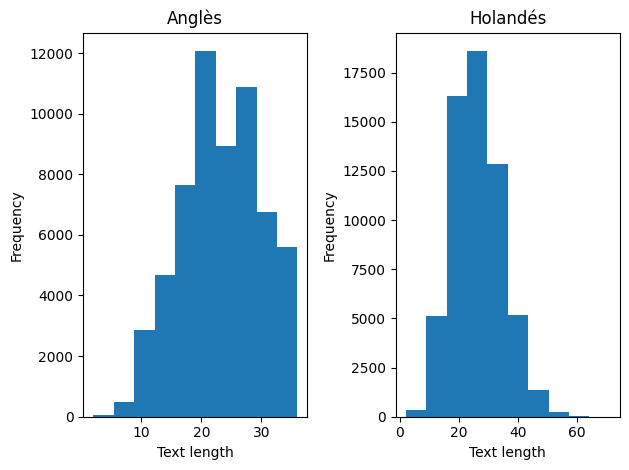

Mida del corpus general: 60000
Mida del corpus de vectors de l'anglès: 60000
Mida del corpus de vectors de l'holandès: 60000
Exemples de vectors de l'anglès
['go' 'go' 'hi' 'hi' 'hi' 'run' 'run' 'run' 'run' 'who' 'wow' 'duck'
 'fire' 'fire' 'help' 'jump' 'stop' 'stop' 'stop' 'stop']
Exemples de vectors de l'holandès
['lopen' 'vooruit' 'hoi' 'hé' 'hai' 'ren' 'vlucht' 'ren' 'vlucht' 'wie'
 'das niet gek' 'eend' 'vuur' 'brand' 'help' 'spring' 'stop' 'hou op'
 'hou daarmee op' 'geen beweging']


In [6]:
#############################################
# SOLUCIÓ                                  #
#############################################

# Visualitzem les dades
import matplotlib.pyplot as plt

length_for_eng = list(map(lambda x: len(x), eng_dutch[:,0]))
# Creem subgràfic per al primer histograma
#plt.hist(length_for_eng)
plt.subplot(1, 2, 1)
plt.hist(length_for_eng)
plt.title('Anglès')
plt.xlabel('Text length')
plt.ylabel('Frequency')

length_for_dutch = list(map(lambda x: len(x), eng_dutch[:,1]))
# Creem subgràfic per al segon histograma
plt.subplot(1, 2, 2)
plt.hist(length_for_dutch)
plt.title('Holandés')
plt.xlabel('Text length')
plt.ylabel('Frequency')

# Ajustar els espais entre subgràficos
plt.tight_layout()

# Mostrar els gràfics
plt.show()

# Mostrar la mida del corpus
print("Mida del corpus general:", len(eng_dutch))
# Mostrar els vectors de l'anglès i els de l'holandès
print("Mida del corpus de vectors de l'anglès:", len(eng_dutch[:, 0]))
print("Mida del corpus de vectors de l'holandès:", len(eng_dutch[:, 1]))
print("Exemples de vectors de l'anglès")
print(eng_dutch[:20, 0])
print("Exemples de vectors de l'holandès")
print(eng_dutch[:20, 1])

In [7]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Calcular el vocabulari tant en holandès com en anglès, i imprimir-ne la mida.

In [9]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
#############################################
# SOLUCIÓ                                  #
#############################################
# Calcular el vocabulari tant en holandès com en anglès, i imprimir-ne la mida.

from keras.preprocessing.text import Tokenizer

def tokenization(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

eng_tokenizer = tokenization(eng_dutch[:, 0])
# print(eng_tokenizer.word_index.keys())
# Obté el diccionari de paraules e index a partir de l'atribut 'word_index' de l'objecte 'Tokenizer'.
eng_vocab_size = len(eng_tokenizer.word_index) + 1
print('English vocabulary size: ',eng_vocab_size)

dutch_tokenizer = tokenization(eng_dutch[:, 1])
dutch_vocab_size = len(dutch_tokenizer.word_index) + 1
print('Dutch vocabulary size: ', dutch_vocab_size)




English vocabulary size:  8377
Dutch vocabulary size:  11753


Separem els conjunts d'entrenament per idioma i els codifiquem.

In [11]:
#############################################
# SOLUCIÓ                                  #
#############################################
# Importació de biblioteques:
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences

def encode_sequences(tokenizer, length, lines):
    # Converteix les linies de texte en seqüències numériques amb el métode texts_to_sequences
    seq = tokenizer.texts_to_sequences(lines)
    # Apliquem el faciment de seqüències per asegurar que totes les seqüències son iguals
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

# Dividim les dades en conjunt d'entrenament i proves, en una proporció 80:20 (20% per proves) i establim una llavor per la reproductibilitat
train, test = train_test_split(eng_dutch, test_size=0.2, random_state = 12)

# Codificació de seqüències de texte per als conjunts d'entrenament i proves
# Aplica la funció 'encode_sequences' al tokenitzador 'eng_tokenizer' per obtenir les seqüències codificades per les entrades de entrenament
max_text_len = 4     # Longitut de la frase més llarga

trainX = encode_sequences(eng_tokenizer, max_text_len, train[:, 0])
# Obtenim les seqüències codificades per les sortides d'entrenament.
trainY = encode_sequences(dutch_tokenizer, max_text_len, train[:, 1])
print('Frases en holandes:\n', train[:,1])
print('\nFrases en holandes codificades:\n', trainX)

# Codifiquem les seqüències de texte per les entrades i sortides del conjunt de prova.
testX = encode_sequences(eng_tokenizer, max_text_len, test[:, 0])
testY = encode_sequences(dutch_tokenizer, max_text_len, test[:, 1])


Frases en holandes:
 ['hij is een typische japanse man' 'ze was aan het hijgen'
 'tom heeft een briefje in marias kluisje achtergelaten' ...
 'we zaten recht tegenover directieleden' 'jullie moeten meer vezels eten'
 'tom is hier altijd']

Frases en holandes codificades:
 [[   5 2452  685  257]
 [  37   16 4353    0]
 [2619   13  342 2948]
 ...
 [   6  429   43 4248]
 [   6   98  121 4107]
 [   2    7  139   44]]


Definim el model encoder-decoder basant-nos en el notebook vist a l'assignatura, i instànim el model amb una capa d'embedding per a les frases de la llengua origen (anglès) i la dimensió de l'última capa com el vocabulari de la llengua destinació (holandès)

In [12]:
#############################################
# Definim el model encoder-decoder
# Definim una arquitectura de model de seqüència amb seqüència amb atenció utilitzant capes d'incrustació (embedding) i capes LSTM

from keras.models import Sequential     # per crear un model seqüèncial
from keras.layers import Dense, LSTM, Embedding, RepeatVector    # per afegir diferents capes al model

embed_vec_length = 300   # Longitut del vector embedding, dimensió del vector
units = 200      # quantitat d'unitats en la capa LSTM


def define_model(eng_vocab_size, embed_vec_len, max_text_len, out_vocab_size):
    ed_model = Sequential()    # Crea instància del model seqüencial
    # Afegeix una cap d'incrustació que converteix els indexos de paraules en vectors d'incrustació de longitut 'embed_vec_len'.
    # L'entrada té la longitut 'max_text_len' i s'extableis mask_zero=Trueper ignorar les entrades de valor zero.
    ed_model.add(Embedding(eng_vocab_size, embed_vec_length, input_length = max_text_len, mask_zero=True))
    ed_model.add(LSTM(units))      # afegeix una capa LSTM amb 'units' unitats, que procesa la seqüència d'entrada i genera un estat ocult
    ed_model.add(RepeatVector(max_text_len))   # Repeteix l'estat ocult 'max_text_len' vegades per generar una seqüència de sortida enlloc d'un unic estat ocult.
    ed_model.add(LSTM(units, return_sequences=True))  # Afegeix una altra capa LSTM amb 'units' unitats i indiquem 'return_sequences=True' per obtenir una seqüència de sortida en lloc d'un sol estat ocult.
    ed_model.add(Dense(out_vocab_size, activation='softmax'))   # Afegeix una capa 'Dense' amb 'out_vocab_size' neurones i activació 'softmax' per obtenir la distribució de probabilitat sobre el vocabulari de la llengua destí.
    return ed_model

# Passem a la funció: la mida del vocabulari de la llengua origen, la longitut del vector embedding,
# la longituT màxima de les seqüències de texto d'entrada i la mida del vocabulari de la lengua destí.
ed_model = define_model(eng_vocab_size, embed_vec_length, max_text_len, dutch_vocab_size)

Compilem el model

In [13]:
#############################################
# Compilació d'un model a TensorFlow-Keras utilitzant l'optimitzador RMSprop i la funció de pèrdua "sparse_categorical_crossentropy".
# Optimitzador per ajustar els pesos del model durant l'entrenament, en funció de la taxa d'aprentatge i altres paràmetres definits
# La funció de pèrdues per calcular la discrepància entre les prediccions del model i les etiquetes reals

from keras import optimizers

rms = optimizers.RMSprop(learning_rate=0.001)    #crea una instància de l'optimitzador RMSprop amb una taxa d'aprenentatge (learning_rate) de 0.001.
ed_model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')     # Compila el model

Entrenem i guardem el model.
El model pot trigar hores si es fa a CPU, molt menys si es pot fer a GPU. Colab permet l'ús de GPU en general, si no se'n fa un ús extensiu, i es va deshabilitant l'opció i habilitant segons necessitats. Si es té activada sempre penalitza i la desactiva. Per provar si funciona, recomanem provar de llançar l'entrenament només amb una època i veure què funciona, i una vegada tenim clar que el flux està funcionant, ia llançar-ne moltes més.

Hem vist que a Colab, tot i que demanem que la mida de sentència màxima sigui 12, no pot carregar el model en memòria i recomanem baixar-lo a 4 i el nombre d'units a 200, d'aquesta manera si que és capaç de treballar.

In [14]:
#############################################
# SOLUCIÓ                                  #
#############################################

# Entrenem y guardem el model
# ModelCheckpoint permet guardar el model durant l'entrenament en funció de certes condicions
from keras.callbacks import ModelCheckpoint

model_path = 'model_en_du'   # Path on es guardarà el model
# Creem instància de 'ModelCheckpoint'
# model_path: ruta on es guardarà el model.
# verbose=1: Mostra infomació detallada sobre el procès de guardat
# save_best_only=True: només es guarda el millor model segons la mètrica de seguiment (en aquest cas, la pèrdua mínima en el conjunt de validació).
# mode='min': es desa el model quan la mètrica de seguiment es minimitza.
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Entrenament del model 'ed_model' fent servir les dades d'entrenament trainX i trainY
# epochs=30: Número d'epoques d'entrenament
# batch_size=512: model del lot o batch fet servir durant l'entrenament
# validation_split = 0.2 proporció de les dades d'entrenament que es faran servir com a conjunt de validació.
# callbacks: es passa l'objecte ModelCheckpoint durant l'entrenament per desar el model.
# verbose =1:  es mostra informació detallada durant l'entrenament.
ed_model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], verbose=1)


Epoch 1/30
75/75 [==============================] - ETA: 0s - loss: 6.8085
Epoch 1: val_loss improved from inf to 6.40240, saving model to model_en_du


75/75 [==============================] - 26s 233ms/step - loss: 6.8085 - val_loss: 6.4024
Epoch 2/30
74/75 [============================>.] - ETA: 0s - loss: 6.2493
Epoch 2: val_loss improved from 6.40240 to 6.28145, saving model to model_en_du


75/75 [==============================] - 16s 210ms/step - loss: 6.2482 - val_loss: 6.2814
Epoch 3/30
74/75 [============================>.] - ETA: 0s - loss: 6.0710
Epoch 3: val_loss improved from 6.28145 to 6.12799, saving model to model_en_du


75/75 [==============================] - 16s 212ms/step - loss: 6.0700 - val_loss: 6.1280
Epoch 4/30
75/75 [==============================] - ETA: 0s - loss: 5.8807
Epoch 4: val_loss improved from 6.12799 to 6.00654, saving model to model_en_du


75/75 [==============================] - 16s 219ms/step - loss: 5.8807 - val_loss: 6.0065
Epoch 5/30
73/75 [============================>.] - ETA: 0s - loss: 5.7076
Epoch 5: val_loss improved from 6.00654 to 5.80798, saving model to model_en_du


75/75 [==============================] - 17s 232ms/step - loss: 5.7074 - val_loss: 5.8080
Epoch 6/30
73/75 [============================>.] - ETA: 0s - loss: 5.5111
Epoch 6: val_loss improved from 5.80798 to 5.65701, saving model to model_en_du


75/75 [==============================] - 15s 208ms/step - loss: 5.5115 - val_loss: 5.6570
Epoch 7/30
74/75 [============================>.] - ETA: 0s - loss: 5.3317
Epoch 7: val_loss improved from 5.65701 to 5.50039, saving model to model_en_du


75/75 [==============================] - 16s 212ms/step - loss: 5.3328 - val_loss: 5.5004
Epoch 8/30
73/75 [============================>.] - ETA: 0s - loss: 5.1338
Epoch 8: val_loss improved from 5.50039 to 5.34828, saving model to model_en_du


75/75 [==============================] - 15s 208ms/step - loss: 5.1312 - val_loss: 5.3483
Epoch 9/30
74/75 [============================>.] - ETA: 0s - loss: 4.9262
Epoch 9: val_loss improved from 5.34828 to 5.18022, saving model to model_en_du


75/75 [==============================] - 16s 211ms/step - loss: 4.9259 - val_loss: 5.1802
Epoch 10/30
75/75 [==============================] - ETA: 0s - loss: 4.7317
Epoch 10: val_loss improved from 5.18022 to 5.04975, saving model to model_en_du


75/75 [==============================] - 16s 214ms/step - loss: 4.7317 - val_loss: 5.0497
Epoch 11/30
74/75 [============================>.] - ETA: 0s - loss: 4.5492
Epoch 11: val_loss improved from 5.04975 to 4.92239, saving model to model_en_du


75/75 [==============================] - 15s 207ms/step - loss: 4.5497 - val_loss: 4.9224
Epoch 12/30
74/75 [============================>.] - ETA: 0s - loss: 4.3721
Epoch 12: val_loss improved from 4.92239 to 4.81082, saving model to model_en_du


75/75 [==============================] - 16s 213ms/step - loss: 4.3726 - val_loss: 4.8108
Epoch 13/30
73/75 [============================>.] - ETA: 0s - loss: 4.2080
Epoch 13: val_loss improved from 4.81082 to 4.69128, saving model to model_en_du


75/75 [==============================] - 16s 209ms/step - loss: 4.2082 - val_loss: 4.6913
Epoch 14/30
75/75 [==============================] - ETA: 0s - loss: 4.0495
Epoch 14: val_loss improved from 4.69128 to 4.59799, saving model to model_en_du


75/75 [==============================] - 16s 211ms/step - loss: 4.0495 - val_loss: 4.5980
Epoch 15/30
74/75 [============================>.] - ETA: 0s - loss: 3.9012
Epoch 15: val_loss improved from 4.59799 to 4.49315, saving model to model_en_du


75/75 [==============================] - 16s 220ms/step - loss: 3.9009 - val_loss: 4.4932
Epoch 16/30
75/75 [==============================] - ETA: 0s - loss: 3.7610
Epoch 16: val_loss improved from 4.49315 to 4.40482, saving model to model_en_du


75/75 [==============================] - 16s 216ms/step - loss: 3.7610 - val_loss: 4.4048
Epoch 17/30
74/75 [============================>.] - ETA: 0s - loss: 3.6259
Epoch 17: val_loss improved from 4.40482 to 4.32344, saving model to model_en_du


75/75 [==============================] - 16s 210ms/step - loss: 3.6259 - val_loss: 4.3234
Epoch 18/30
73/75 [============================>.] - ETA: 0s - loss: 3.4954
Epoch 18: val_loss improved from 4.32344 to 4.25026, saving model to model_en_du


75/75 [==============================] - 16s 209ms/step - loss: 3.4971 - val_loss: 4.2503
Epoch 19/30
74/75 [============================>.] - ETA: 0s - loss: 3.3744
Epoch 19: val_loss improved from 4.25026 to 4.18016, saving model to model_en_du


75/75 [==============================] - 16s 213ms/step - loss: 3.3732 - val_loss: 4.1802
Epoch 20/30
74/75 [============================>.] - ETA: 0s - loss: 3.2503
Epoch 20: val_loss improved from 4.18016 to 4.12322, saving model to model_en_du


75/75 [==============================] - 16s 211ms/step - loss: 3.2520 - val_loss: 4.1232
Epoch 21/30
75/75 [==============================] - ETA: 0s - loss: 3.1393
Epoch 21: val_loss improved from 4.12322 to 4.05703, saving model to model_en_du


75/75 [==============================] - 16s 213ms/step - loss: 3.1393 - val_loss: 4.0570
Epoch 22/30
75/75 [==============================] - ETA: 0s - loss: 3.0303
Epoch 22: val_loss improved from 4.05703 to 4.00007, saving model to model_en_du


75/75 [==============================] - 16s 215ms/step - loss: 3.0303 - val_loss: 4.0001
Epoch 23/30
74/75 [============================>.] - ETA: 0s - loss: 2.9261
Epoch 23: val_loss improved from 4.00007 to 3.94797, saving model to model_en_du


75/75 [==============================] - 16s 210ms/step - loss: 2.9259 - val_loss: 3.9480
Epoch 24/30
75/75 [==============================] - ETA: 0s - loss: 2.8274
Epoch 24: val_loss improved from 3.94797 to 3.91261, saving model to model_en_du


75/75 [==============================] - 16s 215ms/step - loss: 2.8274 - val_loss: 3.9126
Epoch 25/30
74/75 [============================>.] - ETA: 0s - loss: 2.7311
Epoch 25: val_loss improved from 3.91261 to 3.86680, saving model to model_en_du


75/75 [==============================] - 15s 209ms/step - loss: 2.7320 - val_loss: 3.8668
Epoch 26/30
75/75 [==============================] - ETA: 0s - loss: 2.6419
Epoch 26: val_loss improved from 3.86680 to 3.83769, saving model to model_en_du


75/75 [==============================] - 15s 208ms/step - loss: 2.6419 - val_loss: 3.8377
Epoch 27/30
73/75 [============================>.] - ETA: 0s - loss: 2.5567
Epoch 27: val_loss improved from 3.83769 to 3.79097, saving model to model_en_du


75/75 [==============================] - 16s 212ms/step - loss: 2.5568 - val_loss: 3.7910
Epoch 28/30
73/75 [============================>.] - ETA: 0s - loss: 2.4720
Epoch 28: val_loss improved from 3.79097 to 3.77055, saving model to model_en_du


75/75 [==============================] - 16s 213ms/step - loss: 2.4724 - val_loss: 3.7706
Epoch 29/30
75/75 [==============================] - ETA: 0s - loss: 2.3941
Epoch 29: val_loss improved from 3.77055 to 3.73050, saving model to model_en_du


75/75 [==============================] - 16s 213ms/step - loss: 2.3941 - val_loss: 3.7305
Epoch 30/30
73/75 [============================>.] - ETA: 0s - loss: 2.3151
Epoch 30: val_loss improved from 3.73050 to 3.71125, saving model to model_en_du


75/75 [==============================] - 16s 212ms/step - loss: 2.3183 - val_loss: 3.7113


Un cop entrenat el model, s'aplica amb el conjunt de tests per obtenir unes predicions.

In [15]:
#############################################
# Realitzem prediccions fent servir el model entrenat 'ed_model'  en un conjunt de dades de prova
import numpy as np

# np.argmax: per obtenir l'índex de la classe amb més probabilitat per a cada exemple de prova. Els índexs de les classes amb més probabilitat s'assignen a la variable preds.
predicts = np.argmax(ed_model.predict(testX.reshape((testX.shape[0],testX.shape[1]))), axis=-1)
print(predicts)

375/375 [==============================] - 2s 3ms/step
[[  10    4   28  291]
 [  41    5    5   81]
 [  63   13   47 2219]
 ...
 [   4    4    4 1156]
 [   1   13   92  158]
 [   6    6  751   21]]


Visualitzem els resultats de les prediccions amb els valors esperats. Els resultats són curiosos, no podríem fer servir aquest model per a un entorn real com podreu veure.

Pregunta: Perquè creieu que no són bons, i com creieu que podrien obtenir-se millors resultats?

In [16]:
#############################################
# Visualitzem resultats
import pandas as pd

def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

preds_du = []

for i in predicts[:25]:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], dutch_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], dutch_tokenizer)) or (t == None):
                     temp.append('')
            else:
                     temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t)

    preds_du.append(' '.join(temp))

predicció = pd.DataFrame({'Current' : test[:,1][:25], 'predicted' : preds_du})
predicció

,Current,predicted
0,hoelang heeft u dit al,heb je dit gevonden
1,ik heb het huis nog niet gerenoveerd,nog het huis
2,ik hou van amerikaanse films,hou van deze chocolademelk
3,hoe is dat jouw fout,zijn dat jullie
4,heeft tom geantwoord,heeft tom gereageerd
5,tom heeft nauwelijks voor het examen gestudeerd,voor het feestje
6,weet hij wat je hebt gedaan,wat je hebt
7,ik vertel je alleen wat ik hoorde,wat ik heb
8,ik vraag me af of tom doof aan het worden is o...,tom is dood
9,ik eet niet,ik eet niet


**Pregunta: Perquè creieu que no són bons, i com creieu que podrien obtenir-se millors resultats?**

Les prediccions no son bones degut a que els valors predits no coincideixen amb els valors reals. Hi ha eliminació de paraules, apareixen altres paraules que no hi eren, etc.

Això pot haver sigut per diversos motius:
- **Per un entrenament insuficient**: Quan el model no ha estat prou entrenat o la quantitat de dades d'entrenament no eren suficients per aprendre les relacions i els patrons en el text.
- **Grandària inadequada del conjunt de dades**: Si el conjunt de dades utilitzat per entrenar el model no representa adequadament la variabilitat i diversitat del llenguatge, el que dificulta fer prediccions precises en nous exemples.
- **Modelat inadequat del problema**: L'arquitectura del model o els hiperparàmetres utilitzats poden no ser els més adequats per al problema en qüestió. És possible que es requereixi una arquitectura més complexa o una configuració diferent dels hiperparàmetres per millorar les prediccions.
- **Sobreajustament (overfitting)**: Si el model s'ha sobreajustat a les dades d'entrenament, és a dir, quan ha memoritzat els exemples d'entrenament en lloc d'aprendre patrons generals, pot tenir dificultats per generalitzar nous exemples i produir prediccions precises.

**Per obtenir millors resultats:**

- Revisar i ampliar el conjunt de dades d'entrenament per garantir una representativitat i diversitat més gran del llenguatge.
- Augmentar el nombre d'èpoques d'entrenament o provar-ho amb diferents arquitectures i configuracions d'hiperparàmetres.
- Considerar l'ús de tècniques de regularització, com la incorporació de capes de dropout, per evitar el sobreajustament.
- Avaluar i ajustar l'exercici del model mitjançant mètriques d'avaluació adequades i anàlisi detallada dels errors comesos.


## 1.2 TA amb Embeddings preentrenats (2 punts)

En aquest apartat repetirem l'exercici anterior carregant a la capa d'embedding els pesos d‟un model GloVe entrenat per l'anglès.

Comencem carregant el model GloVe per a l'anglès. Podeu fer servir 'glove.42B.300d.txt' baixant-lo d'aquí https://nlp.stanford.edu/projects/glove/.

In [17]:
import numpy as np

embeddings_index = {}
try:
  f = open('glove.42B.300d.txt')
except:
  f = open('/content/drive/MyDrive/glove.42B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(len(embeddings_index))

1917494


Tot seguit, hem de construir la matriu d'embeddings.
Per no carregar tot el vocabulari del model, podem filtrar només aquelles entrades presents al vocabulari del tokenitzador que farem servir. A més, hem d'incloure a la matriu de vectors corresponents els índexs de les entrades (paraules) que no trobem al model glove carregat. Aquests vectors se solen inicialitzar amb 0 o amb el resultat d'una distribució N(0,1)

Per exemple, si el nostre tokenitzador es digués `eng_tokenizer` podríem fer:

In [18]:
embedding_matrix = np.zeros((len(eng_tokenizer.word_index) + 1, 300))
for word, i in eng_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


Per inicialitzar una capa d'embeddings amb pesos predefinits s'utilitza l'argument weights. A més, com que no volem que es modifiquin els pesos, marquem l'argument `trainable` com `False`.

Seguint amb el nostre exemple, faríem:

In [19]:
from keras.layers import Embedding

embed_vec_length = 300
embedding_layer = Embedding(len(eng_tokenizer.word_index) + 1,
                            embed_vec_length,
                            weights=[embedding_matrix],
                            input_length=max_text_len,
                            trainable=False,
                            mask_zero=True)


Implementa i entrena de nou un model de traducció automàtica de l'anglès al holandès de manera similar, aquesta vegada carregant els pesos de la capa embedding a partir del model Glove preentrenat en anglès i disponible a 'glove.42B.300d.txt'.

In [20]:
#############################################
# SOLUCIÓN                                  #
#############################################
from keras.models import Sequential     # per crear un model seqüèncial
from keras.layers import Dense, LSTM, Embedding, RepeatVector    # per afegir diferents capes al model

from keras import optimizers

def def_model(embedding_layer, embedding_vec_length, max_text_length, out_vocab_size):
    mt_model2 = Sequential()
    mt_model2.add(embedding_layer)
    mt_model2.add(LSTM(embedding_vec_length))
    mt_model2.add(RepeatVector(max_text_length))
    mt_model2.add(LSTM(embedding_vec_length, return_sequences=True))
    mt_model2.add(Dense(out_vocab_size, activation='softmax'))
    return mt_model2

mt_model2 = def_model(embedding_layer, embed_vec_length, max_text_len, dutch_vocab_size)
print(mt_model2.summary())

rms = optimizers.RMSprop(learning_rate=0.001)
mt_model2.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 300)            2513100   
                                                                 
 lstm_2 (LSTM)               (None, 300)               721200    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 4, 300)           0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 4, 300)            721200    
                                                                 
 dense_1 (Dense)             (None, 4, 11753)          3537653   
                                                                 
Total params: 7,493,153
Trainable params: 4,980,053
Non-trainable params: 2,513,100
____________________________________

Entrenem i guardem el model. Un altre cop, encara que aquest entrenament és potser un "poc" més lleuger que l'anterior, recomanem l'ús de GPU si és viable.

In [21]:
#############################################
# SOLUCIÓN                                  #
#############################################

from keras.callbacks import ModelCheckpoint

# trainX té una mida de matriu on el primer valor es el número de mostres i la segona dimensió la longitut de cada mostra
print(trainX.shape)
print(trainY.shape[0])
print(trainY.shape[1])

model_path = 'model_en_du-2'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
mt_model2.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], verbose=1)




(48000, 4)
48000
4
Epoch 1/30
75/75 [==============================] - ETA: 0s - loss: 6.5351
Epoch 1: val_loss improved from inf to 6.22039, saving model to model_en_du-2


75/75 [==============================] - 22s 246ms/step - loss: 6.5351 - val_loss: 6.2204
Epoch 2/30
75/75 [==============================] - ETA: 0s - loss: 5.9470
Epoch 2: val_loss improved from 6.22039 to 5.82517, saving model to model_en_du-2


75/75 [==============================] - 17s 228ms/step - loss: 5.9470 - val_loss: 5.8252
Epoch 3/30
75/75 [==============================] - ETA: 0s - loss: 5.4283
Epoch 3: val_loss improved from 5.82517 to 5.35110, saving model to model_en_du-2


75/75 [==============================] - 16s 220ms/step - loss: 5.4283 - val_loss: 5.3511
Epoch 4/30
75/75 [==============================] - ETA: 0s - loss: 4.9602
Epoch 4: val_loss improved from 5.35110 to 4.97373, saving model to model_en_du-2


75/75 [==============================] - 16s 221ms/step - loss: 4.9602 - val_loss: 4.9737
Epoch 5/30
75/75 [==============================] - ETA: 0s - loss: 4.5300
Epoch 5: val_loss improved from 4.97373 to 4.64954, saving model to model_en_du-2


75/75 [==============================] - 16s 220ms/step - loss: 4.5300 - val_loss: 4.6495
Epoch 6/30
75/75 [==============================] - ETA: 0s - loss: 4.1608
Epoch 6: val_loss improved from 4.64954 to 4.40467, saving model to model_en_du-2


75/75 [==============================] - 16s 222ms/step - loss: 4.1608 - val_loss: 4.4047
Epoch 7/30
75/75 [==============================] - ETA: 0s - loss: 3.8464
Epoch 7: val_loss improved from 4.40467 to 4.17040, saving model to model_en_du-2


75/75 [==============================] - 16s 219ms/step - loss: 3.8464 - val_loss: 4.1704
Epoch 8/30
75/75 [==============================] - ETA: 0s - loss: 3.5825
Epoch 8: val_loss improved from 4.17040 to 4.00817, saving model to model_en_du-2


75/75 [==============================] - 16s 221ms/step - loss: 3.5825 - val_loss: 4.0082
Epoch 9/30
75/75 [==============================] - ETA: 0s - loss: 3.3502
Epoch 9: val_loss improved from 4.00817 to 3.83204, saving model to model_en_du-2


75/75 [==============================] - 17s 225ms/step - loss: 3.3502 - val_loss: 3.8320
Epoch 10/30
75/75 [==============================] - ETA: 0s - loss: 3.1455
Epoch 10: val_loss improved from 3.83204 to 3.71640, saving model to model_en_du-2


75/75 [==============================] - 16s 221ms/step - loss: 3.1455 - val_loss: 3.7164
Epoch 11/30
75/75 [==============================] - ETA: 0s - loss: 2.9616
Epoch 11: val_loss improved from 3.71640 to 3.63285, saving model to model_en_du-2


75/75 [==============================] - 17s 224ms/step - loss: 2.9616 - val_loss: 3.6328
Epoch 12/30
75/75 [==============================] - ETA: 0s - loss: 2.8003
Epoch 12: val_loss improved from 3.63285 to 3.52889, saving model to model_en_du-2


75/75 [==============================] - 16s 219ms/step - loss: 2.8003 - val_loss: 3.5289
Epoch 13/30
75/75 [==============================] - ETA: 0s - loss: 2.6531
Epoch 13: val_loss improved from 3.52889 to 3.44784, saving model to model_en_du-2


75/75 [==============================] - 16s 222ms/step - loss: 2.6531 - val_loss: 3.4478
Epoch 14/30
75/75 [==============================] - ETA: 0s - loss: 2.5187
Epoch 14: val_loss improved from 3.44784 to 3.38790, saving model to model_en_du-2


75/75 [==============================] - 16s 219ms/step - loss: 2.5187 - val_loss: 3.3879
Epoch 15/30
75/75 [==============================] - ETA: 0s - loss: 2.3899
Epoch 15: val_loss improved from 3.38790 to 3.33879, saving model to model_en_du-2


75/75 [==============================] - 17s 232ms/step - loss: 2.3899 - val_loss: 3.3388
Epoch 16/30
75/75 [==============================] - ETA: 0s - loss: 2.2754
Epoch 16: val_loss improved from 3.33879 to 3.29610, saving model to model_en_du-2


75/75 [==============================] - 16s 221ms/step - loss: 2.2754 - val_loss: 3.2961
Epoch 17/30
75/75 [==============================] - ETA: 0s - loss: 2.1660
Epoch 17: val_loss improved from 3.29610 to 3.26348, saving model to model_en_du-2


75/75 [==============================] - 17s 226ms/step - loss: 2.1660 - val_loss: 3.2635
Epoch 18/30
75/75 [==============================] - ETA: 0s - loss: 2.0635
Epoch 18: val_loss improved from 3.26348 to 3.23472, saving model to model_en_du-2


75/75 [==============================] - 17s 224ms/step - loss: 2.0635 - val_loss: 3.2347
Epoch 19/30
75/75 [==============================] - ETA: 0s - loss: 1.9653
Epoch 19: val_loss improved from 3.23472 to 3.19535, saving model to model_en_du-2


75/75 [==============================] - 17s 230ms/step - loss: 1.9653 - val_loss: 3.1953
Epoch 20/30
75/75 [==============================] - ETA: 0s - loss: 1.8739
Epoch 20: val_loss improved from 3.19535 to 3.17315, saving model to model_en_du-2


75/75 [==============================] - 16s 221ms/step - loss: 1.8739 - val_loss: 3.1732
Epoch 21/30
75/75 [==============================] - ETA: 0s - loss: 1.7876
Epoch 21: val_loss improved from 3.17315 to 3.16830, saving model to model_en_du-2


75/75 [==============================] - 17s 223ms/step - loss: 1.7876 - val_loss: 3.1683
Epoch 22/30
75/75 [==============================] - ETA: 0s - loss: 1.7063
Epoch 22: val_loss improved from 3.16830 to 3.14725, saving model to model_en_du-2


75/75 [==============================] - 16s 219ms/step - loss: 1.7063 - val_loss: 3.1473
Epoch 23/30
75/75 [==============================] - ETA: 0s - loss: 1.6304
Epoch 23: val_loss improved from 3.14725 to 3.14530, saving model to model_en_du-2


75/75 [==============================] - 17s 226ms/step - loss: 1.6304 - val_loss: 3.1453
Epoch 24/30
75/75 [==============================] - ETA: 0s - loss: 1.5577
Epoch 24: val_loss improved from 3.14530 to 3.12791, saving model to model_en_du-2


75/75 [==============================] - 16s 219ms/step - loss: 1.5577 - val_loss: 3.1279
Epoch 25/30
75/75 [==============================] - ETA: 0s - loss: 1.4872
Epoch 25: val_loss did not improve from 3.12791
75/75 [==============================] - 3s 33ms/step - loss: 1.4872 - val_loss: 3.1373
Epoch 26/30
75/75 [==============================] - ETA: 0s - loss: 1.4216
Epoch 26: val_loss did not improve from 3.12791
75/75 [==============================] - 2s 33ms/step - loss: 1.4216 - val_loss: 3.1434
Epoch 27/30
75/75 [==============================] - ETA: 0s - loss: 1.3603
Epoch 27: val_loss did not improve from 3.12791
75/75 [==============================] - 2s 33ms/step - loss: 1.3603 - val_loss: 3.1308
Epoch 28/30
75/75 [==============================] - ETA: 0s - loss: 1.2991
Epoch 28: val_loss did not improve from 3.12791
75/75 [==============================] - 3s 35ms/step - loss: 1.2991 - val_loss: 3.1480
Epoch 29/30
75/75 [==============================] - ETA: 0s -

Aplicar el model i visualitzar-ne els resultats a partir de les predicions obtingudes amb aquest nou model.

In [22]:
#############################################
# SOLUCIÓ                                  #
#############################################
import pandas as pd

predicts = np.argmax(mt_model2.predict(testX.reshape((testX.shape[0],testX.shape[1]))), axis=-1)


def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

preds_du = []

for i in predicts[:25]:
    xx = []
    for j in range(len(i)):
        t = get_word(i[j], dutch_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], dutch_tokenizer)) or (t == None):
                     xx.append('')
            else:
                     xx.append(t)
        else:
            if(t == None):
                xx.append('')
            else:
                xx.append(t)

    preds_du.append(' '.join(xx))

predicció = pd.DataFrame({'Current' : test[:,1][:25], 'predicted' : preds_du})
predicció

375/375 [==============================] - 3s 3ms/step


,Current,predicted
0,hoelang heeft u dit al,heb je dit al
1,ik heb het huis nog niet gerenoveerd,huis al huis
2,ik hou van amerikaanse films,ik hou van films
3,hoe is dat jouw fout,is jouw is
4,heeft tom geantwoord,heeft tom gereageerd
5,tom heeft nauwelijks voor het examen gestudeerd,heb voor het examen
6,weet hij wat je hebt gedaan,wat je hebt
7,ik vertel je alleen wat ik hoorde,wat gehoord
8,ik vraag me af of tom doof aan het worden is o...,tom is niet
9,ik eet niet,ik eet niet


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>(Opcional) Anàlisi:</strong> Explica quines són les principals diferències entre els dos models entrenats. Com podríem millorar els resultats d'aquesta tasca concreta?
</div>

**RESPOSTA:**
En el segon model, les predicción s'apropen més als valors actuals i presenten menys errors.
En aquest segon model també es dona inversió de l'ordre de les paraules, com al cas '2-het moet gewassen worden' o la omissió d'alguna paraula com al cas '6-ik voelde me'. Però en general, la majoria de les prediccions son més precisses i s'assemblen més als valors actuals.
Per tant, el segon model sembla que té un rendiment millorat en comparació amb el primer model, per generar prediccions més properes als valors reals.

*Per millorar els resultats d'aquesta tasca concreta es podria aplica el següent*:

1.- Augmentar la mida i la qualitat del conjunt de dades d'entrenament: ja que així el model pot aprendre patrons més precisos i generar millors prediccions. Per tant, cal recopilar més exemples de frases en els dos idiomes i garantir la diversistat de les dades.

2.- Fer un preprocessament de dades més exhaustiu: cal garantir que els models reben dades netes i correctament formatejades. Com eliminar caràcters no desitjats, normalització del texte, correcció d'errors ortogràfics, etc.

3.- Provar amb diferents arquitectures de models: provar diferents arquitectures de xarxes neuronals i ajustar els hiperparàmetres per trobar la configuració óptima per aquesta tasca específica.

4.- Ajustar els hiperparàmetres del model: la taxa d'aprenentatge, la mida del lot, el nombre de capes ocultes, la mida de les capes, etc, ja que poden influir en el rendiment del model.

5.- Fer servir tècniques avançades de NPL: com l'ús de models de llenguatges preentrenats, atenció, mecanismes de traducció per millorar la qualitat de les prediccions.

6.- Realitzar avaluació detallada i anàlisis d'errors: cal analitzar els errors comesos pel model per entendre les àrees en que està fallant i prendre mides correctives específiques. El que pot implicar la identificació de patrons cmuns en els errors i la iteració en el procès de millora del model.

Finalment, per millorar el rendiment en tasques de traducció automàtica es important provar diferents enfocs i tècniques per trobar la combinació que funcioni millor per les dades i els requisits específics de les tasques.

# PART 2


# 2. Classificació de notícies (4 punts)

---

En aquest apartat plantegem l'ús de les arquitectures vistes fins ara per crear un classificador de notícies en anglès.
En concret farem servir aquest dataset:
https://www.kaggle.com/datasets/rmisra/news-category-dataset
És un dataset de classificació que té 42 categories. Ens enfocarem en 6 d'elles. En concret les següents:
+ HEALTHY LIVING
+ VOLER VOICES
+ FOOD & DRINK
+ BUSINESS
+ COMEDY
+ SPORTS

## 2.1 Preparar dades classificació notícies (1 punt)

El primer que farem serà obtenir el dataset, agafar l'arxiu, llegir-lo des d'un dataframe pandes, agafar les columnes “headline” i “category”.

Samplejar el corpus i agafar només les 1000 primeres entrades perquè l'script vagi més ràpid. Més endavant podrem realitzar proves per veure si afegint més entrades tenim millors resultats. Òbviament les entrades, després es repartiran per les categories que hem escollit.

In [23]:

#############################################
# SOLUCIÓ                               #
#############################################

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
  df=pd.read_json('/content/drive/MyDrive/News_Category_Dataset_v3.json', lines=True)
except:
  df=pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)


selected_categories = ['HEALTHY LIVING', 'VOLER VOICES', 'FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS']

# Filtrem el Dataset per les 6 categories que ens interessen
df_selected = df[df['category'].isin(selected_categories)]

# creem un train_df amb stratify per category per tenir quantitats semblants
train_df, _ = train_test_split(df_selected, train_size=1000, stratify=df_selected['category'], random_state=42)

# Reset the index of the selected DataFrame
df_selected = train_df.reset_index(drop=True)

selected_columns = ['headline', 'category']
df_selected = df_selected.loc[:, selected_columns]

df_selected

,headline,category
0,13 Ways To Make Collard Greens Totally Delicious,FOOD & DRINK
1,"Proposed ""Spot The Conspiracy Theory"" Test for...",COMEDY
2,"The 50 Best Craft Beers In America In 2013, Ac...",FOOD & DRINK
3,REMINDER: Michigan Taught Notre Dame How To Pl...,SPORTS
4,Sriracha Oatmeal May Be Our New Favorite Savor...,FOOD & DRINK
...,...,...
995,U.S.A. Beats Germany 2-0 To Advance To Women's...,SPORTS
996,This Political Polarization Is Really Bad for ...,BUSINESS
997,"Jason Collins, Robbie Rogers And Others Celebr...",SPORTS
998,"Can Being in Love Make You Fat? Plus, 10 Sugg...",HEALTHY LIVING


Visualitzeu la distribució de textos per classe.

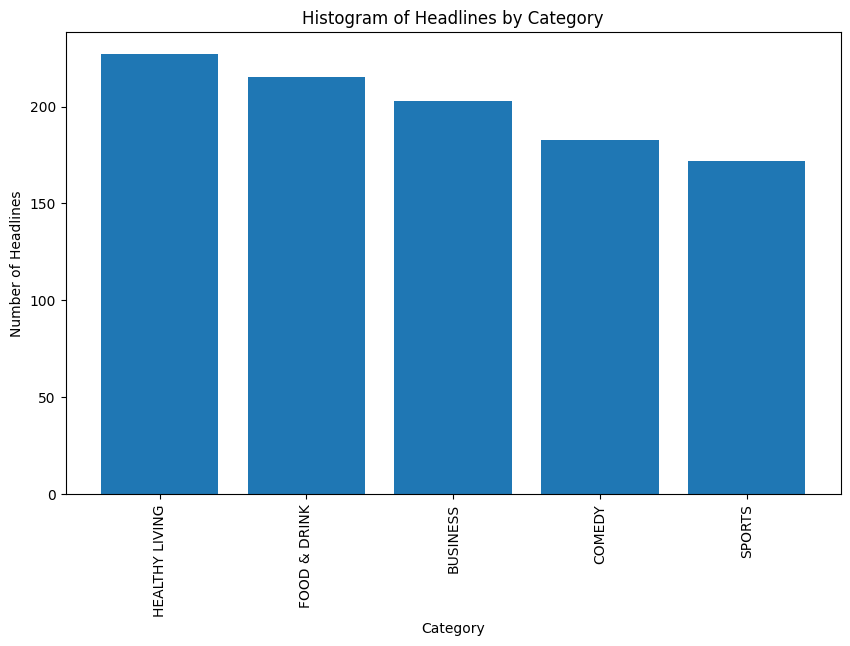

In [24]:
#############################################
# SOLUCIÓ                                #
#############################################

import matplotlib.pyplot as plt

# Count the number of headlines per category
category_counts = df_selected['category'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Headlines')
plt.title('Histogram of Headlines by Category')
plt.xticks(rotation=90)
plt.show()

Prepareu i preprocesseu les dades per a l'entrenament. Farem servir one-hot encoding per les etiquetes.

In [25]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [26]:


#############################################
# SOLUCIÓ                                #
#############################################
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

values = df_selected["category"].values

# Instantiate the LabelEncoder object
label_encoder = LabelEncoder()
# Apply label encoding to transform the text labels into encoded integer values
int_encoded = label_encoder.fit_transform(values)

# Instantiate the OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse=False)
# Reshape the integer_encoded array to have shape (n, 1) where n is the number of elements
int_encoded = int_encoded.reshape(len(int_encoded), 1)
# Apply one-hot encoding to the int_encoded array to get the one-hot representation of the labels
onehot_encoded = onehot_encoder.fit_transform(int_encoded)
# Show the one-hot representation of the categorical labels
# Each row represents a label, and each column indicates the presence or absence of a specific category
print(onehot_encoded)


[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 2.2 Preparar dades i embeddings per entrenar (1 punt)
La idea del model de classificació que volem implementar és més simple que la de l'encoder-decoder usat a l'apartat 1.

El model ha de consistir només a:

- una capa embedding amb els pesos del model Glove preentrenat per a l'anglès disponible a l'arxiu 'glove.42B.300d.txt'
- una capa LSTM amb un nombre d'units a escollir (per exemple, 300)
- una capa Doneu-vos amb una dimensió de sortida que té el nombre de categories amb les quals volem classificar (en aquest cas, 6).
- A més, com els function `loss` utilitzarem 'categorical_crossentropy' i com `optimizer`, 'adam'.

Primerament creem un tokenitzador per a les frases del classificador

In [27]:
#############################################
# SOLUCIÓ                              #
#############################################
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(df_selected["headline"])

Carreguem el model GloVe següent per a l'anglès. Ho hem utilitzat a la part 1.

In [28]:
#############################################
# SOLUCIÓN                                #
#############################################
import numpy as np

embeddings_index = {}
try:
  f = open('glove.42B.300d.txt')
except:
  f = open('/content/drive/MyDrive/glove.42B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(len(embeddings_index))


1917494


Un cop carregat el model de GloVe definim la capa d'Embedding amb tots els pesos

In [29]:
#############################################
# SOLUCIÓN                                  #
#############################################
embedding_matrix = np.zeros((len(eng_tokenizer.word_index) + 1, 300))
for word, i in eng_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(eng_tokenizer.word_index) + 1,
                            embed_vec_length,
                            weights=[embedding_matrix],
                            input_length=max_text_len,
                            trainable=False,
                            mask_zero=True)


Preparem el corpus d'entrenament i test, usant el model_selection de sklearn, i l'onehot_encoded per a les classes. Fem servir 80% per train.

In [30]:
#############################################
# SOLUCIÓ                                  #
#############################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        df_selected["headline"],
        onehot_encoded,
        train_size=0.80,
        random_state=4231)

Codificar els vectors d'entrada pel train i el text

In [31]:
#############################################
# SOLUCIÓ                                  #
#############################################
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq


max_text_length = 4
trainX = encode_sequences(eng_tokenizer, max_text_length, X_train)
testX = encode_sequences(eng_tokenizer, max_text_length, X_test)

## 2.3 Definir el model i entrenar (1 punt).


El model ha de consistir només a:

+ una capa embedding amb els pesos del model GloVe preentrenat per a l'anglès disponible a l'arxiu 'glove.42B.300d.txt'
+ una capa LSTM amb un nombre d'units a escollir (per exemple, 300)
+ una capa Doneu-vos amb una dimensió de sortida que té el nombre de categories amb què volem classificar (en aquest cas, 6).

A més, com els function loss utilitzarem 'categorical_crossentropy' i com a optimizer, 'adam'.

In [32]:
#############################################
# SOLUCIÓN                                  #
#############################################

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

out_label_size = 5
units = 300

def define_model(embedding_layer, units, out_label_size):
    modelx = Sequential()
    modelx.add(embedding_layer)
    modelx.add(LSTM(units))
    modelx.add(Dense(out_label_size, activation='softmax'))
    return modelx

modelx = define_model(embedding_layer, units, out_label_size)
print(modelx.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 300)            3090600   
                                                                 
 lstm_4 (LSTM)               (None, 300)               721200    
                                                                 
 dense_2 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 3,813,305
Trainable params: 722,705
Non-trainable params: 3,090,600
_________________________________________________________________
None


Compilar el model

In [33]:
#############################################
# SOLUCIÓ                                  #
#############################################

modelx.compile(optimizer='adam', loss='categorical_crossentropy')

Entrenar i desar el model. En aquesta secció encara que sigui recomanable fer servir GPU, amb CPU també es pot obtenir el resultat sense haver d'esperar "molt" temps

In [34]:
#############################################
# SOLUCIÓ                                 #
#############################################
history = modelx.fit(trainX, onehot_encoded, epochs=10, batch_size=32, validation_split=0.2)

modelx.save('model.h5')

Epoch 1/10
20/20 [==============================] - 7s 74ms/step - loss: 1.6514 - val_loss: 1.6219
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 1.4766 - val_loss: 1.6677
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 1.3359 - val_loss: 1.7128
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 1.1497 - val_loss: 1.9493
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.9376 - val_loss: 2.1893
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.7554 - val_loss: 2.4835
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5710 - val_loss: 2.4463
Epoch 8/10
20/20 [==============================] - 0s 9ms/step - loss: 0.3853 - val_loss: 3.0432
Epoch 9/10
20/20 [==============================] - 0s 8ms/step - loss: 0.2825 - val_loss: 3.2486
Epoch 10/10
20/20 [==============================] - 0s 8ms/step - loss: 0.1922 - val_loss: 3.7326


## 2.4 Avaluar el model (1 punt)

S'avalua el model i se n'obtenen les diferents mètriques.

In [35]:
#############################################
# SOLUCIÓ                                  #
#############################################
from numpy import argmax
from sklearn import metrics

# Evaluació del model
preds=np.argmax(modelx.predict(testX.reshape((testX.shape[0],testX.shape[1]))), axis=-1)

# Obtenim mètriques
print(metrics.classification_report(list(map(lambda x: argmax(x), y_test)), preds))

7/7 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.16      0.21      0.18        33
           1       0.17      0.12      0.14        41
           2       0.14      0.11      0.12        45
           3       0.19      0.16      0.17        37
           4       0.22      0.30      0.25        44

    accuracy                           0.18       200
   macro avg       0.18      0.18      0.18       200
weighted avg       0.18      0.18      0.17       200



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;"> Què passaria si el model de classificació l'entrenéssim amb més dades? Estem escollint només els 1000 primers, en són molt pocs exemples i s'entrena super ràpid. Què passaria amb 5000? i 10000?
I si no fem servir els embeddings de GloVe? Què ens aporten totes dues coses?
Si fem servir més dades, Cal fer servir els embeddings?

Expressar la vostra opinió amb l'experimentació d'acord per obtenir-ne les conclusions.

**RESPOSTA:**

**Si l'entrenem amb més dades**, es probable que se'n millorin els resultats, incrementant els efectes beneficiosos:

1- Millora de la capacitat de generalització: Amb més dades, el model té accés a una major diversitat de exemples, el que li permet aprendre patrons més representatius i generalitzar millor als nous exemples.

2- Reducció de l'efecte del sobreajustament: Amb un conjunt de dades més gran, el model té més oportunitats per aprendre patrons significatius sense centrar-se excessivament en detalls específics de les mostres individuals. Això ajuda a evitar l'overfitting o sobreajustament, es a dir, quan el model s'adapta massa als detalls del conjunt de dades d'entrenament i no generalitza bé als nous exemples.

3- Millora de la robustesa: Amb més dades, el model pot exposar-se a una major varietat de casos límit o atípics, el que el fa més robust i capaç de gestionar millor situacions inesperades o difícils.

Per altre banda, aquest augment de dades d'entrenament pot implicar un augment en els requeriments computacionals i de temps d'entrenament del model.

**Estem escollint només els 1000 primers, en són molt pocs exemples i s'entrena super ràpid. Què passaria amb 5000? i 10000?**

Augmentar el nombre d'exemples d'entrenament a 5000 o 10000 pot proporcionar una millora en el rendiment del model, però també pot incrementar el temps d'entrenament i requerir ajustos en la complexitat del model. Per tant, caldria trobar un equilibri entre la disponibilitat de dades, els recursos computacionals i les necessitats de rendiment del model.


**I si no fem servir els embeddings de GloVe?**

Si no fem servir els embeddings preentrenats de GloVe i, en canvi, inicialitzem els pesos de la capa d'embedding aleatòriament, podria passar:

1- Rendiment inicial més baix: Els embeddings preentrenats de GloVe estan entrenats en grans quantitats de dades. Això significa que capturen relacions semàntiques i patrons de paraules que són útils per a diverses tasques de processament del llenguatge natural. Si inicialitzem els pesos de l'embedding de manera aleatòria, el model haurà de començar l'aprenentatge des de zero i, en conseqüència, pot obtenir un rendiment inicial més baix fins que aprengui representacions adequades.

2- Més temps d'entrenament: Sense els embeddings preentrenats, el model haurà de treballar més per aprendre representacions útils de les paraules a partir de les dades d'entrenament. Això pot requerir més temps d'entrenament perquè el model ajusti els pesos de l'embedding i adquireixi una comprensió adequada del llenguatge.

3- Depenència de les dades d'entrenament: Quan inicialitzem els pesos de l'embedding aleatòriament, el rendiment del model dependrà en gran mesura de la qualitat i la quantitat de les dades d'entrenament disponibles. Si les dades d'entrenament són limitades o no són representatives del problema, és possible que el model no pugui aprendre representacions òptimes de les paraules i, per tant, obtindrà un rendiment més baix.

Tot i això, amb suficients dades d'entrenament i un temps d'entrenament adequat, un model amb embeddings inicialitzats aleatòriament pot aprendre representacions útils i obtenir un bon rendiment en tasques de processament del llenguatge natural.

**Si fem servir més dades, Cal fer servir els embeddings?**

No necessàriament cal fer servir els embeddings si afegim més dades a l'entrenament del model. L'ús d'embeddings preentrenats pot ser beneficiós quan tenim una quantitat limitada de dades d'entrenament, ja que aquests embeddings capturen coneixement i relacions semàntiques extretes d'un gran corpus. No obstant això, si tenim un conjunt de dades d'entrenament més gran, podríem obtenir resultats satisfactoris sense necessitat d'utilitzar embeddings preentrenats.







# PART 3


# 3. Detecció de NER and NEL (2 punts)

En aquesta part detectarem entitats numerades utilitzant tant SpaCy amb transformers com transformers simplement. En el segon cas usant una llibreria anomenada simple transformers.

D'altra banda, també farem Named Entity Linking (NEL) on cercarem entitats linkades a una base de coneixement (KB), en aquest cas DBpedia. Trobarem els enllaços a Wikpedia de certes entitats del text, utilitzant DBPedia Spotlight.

## 3.1 Detecció de NER a Spacy (1 punt)

Detecció d'entitats nomenades (NER) usant spaCy. En aquesta secció farem servir SpaCy per detectar NER. A partir d'un corpus de CONLL 2003, el reentrenarem i així afinarem la seva cobertura per a aquestes classes.

Instal·lem spacy i fem models de llenguatge que necessitem.

In [36]:
!pip install spacy==3.2.0

!python -m spacy download en_core_web_sm-3.2.0 --direct

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.7
    Uninstalling pydantic-1.10.7:
      Successfully uninstalled pydantic-1.10.7
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.9
    Uninstalling thinc-8.1.9:
      Successfully uninstalled thinc-8.1.9
  Attempting uninstall: spacy
    Found existing 

Definim un parell de funcions que ens permetrà imprimir els resultats de la detecció de NER de forma molt interpretable

In [37]:
def get_tokens_to_print(model, text):
  """Print tokens of the text and its relevant attributes.

    Parameters:
      model (spaCy model): spaCy model used for tokenization
      text (str):  text to transform in a spaCy doc class.

    Returns: ---
  """
  doc = model(text)
  print (f"The text:\n\n{get_text_to_print(text)}\n\nwas converted in a spaCy object: {type(doc)}\n")
  print (f"Token-based analysis. Each token is a spaCy object: {type(doc[0])}\n")

  # We obtain rows to print: headers and content
  rows  = []
  # head_align: List of tuples. Each tuple: heather and its alignment when printing
  head_align  = [('Token', '<'), ('Lemma', '<'), ('Syntactic parent', '<'), ('#Tok', '>'), ('Chr_Start', '>'), ('Chr_End', '>'), ('POS', '<'),
                 ('TAG', '<'), ('TAG meaning:', '<'), ('ENT', '<'), ('DEP', '<'), ('DEP meaning:', '<')]
  head, align = list(zip(*head_align))
  rows.append(head)                           # Header
  rows.append(['='*len(i) for i in head])     # Underline headers
  for tok in doc:
    rows.append([tok.text, tok.lemma_, tok.head.text, str(tok.i), str(tok.idx), str(tok.idx+len(tok)-1), tok.pos_,
                 tok.tag_, str(spacy.explain(tok.tag_))[:20], tok.ent_type_, tok.dep_, str(spacy.explain(tok.dep_))[:20]])

  # Width of each column: the witdh of the longest element
  columns       = zip(*rows)
  column_widths = [max(len(i) for i in col) for col in columns]

  # Print the files with alignment
  for row in rows:
    print(*[f"{row[i]:{align[i]}{column_widths[i]}}  " for i in range(0, len(row))])

In [38]:
def get_text_to_print(text):
  """Format given text.

    Parameters:
      text (str): text to print

    Returns:
      str: text formatted in 100 character lines with an initial line numbering the characters
  """
  line_length = 100
  line_poss   = "     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100"
  text        = text.replace("\n", " ")     # In order to avoid that the \n character produces a line change.
  text        = text.replace("\r", " ")     # In wikipedia texts we have detected the character '\r' that, if interpreted, may induce some printing problems.
  text_format = "\n".join([ f"{i//line_length:<5}{text[i:i+line_length]}"  for i in range(0, len(text), line_length) ])
  return line_poss + "\n" + text_format + "\n" + line_poss

Carreguem el model "en_core_web_sm"

In [39]:
#
##################
## SOLUCIO ####
##################

import spacy
MODEL = "en_core_web_sm"
nlp_md = spacy.load(MODEL)
print (f"Model carregat: '{MODEL}'  loaded correctly!")

Model carregat: 'en_core_web_sm'  loaded correctly!


Convertim un text en objecte 'Doc' de spaCy i visualitzem els resultats d'analitzar aquest text a nivell de POS, NER, ENT, DEP...

In [40]:
##################
## SOLUCIO ####
##################

# Convertir un text en objecte 'Doc' de spaCy
text = "True happiness comes from the joy of deeds well done, the zest of creating things new"

get_tokens_to_print(nlp_md, text)

The text:

     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100
0    True happiness comes from the joy of deeds well done, the zest of creating things new
     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100

was converted in a spaCy object: <class 'spacy.tokens.doc.Doc'>

Token-based analysis. Each token is a spaCy object: <class 'spacy.tokens.token.Token'>

Token       Lemma       Syntactic parent   #Tok   Chr_Start   Chr_End   POS     TAG   TAG meaning:           ENT   DEP      DEP meaning:          
=====       =====       ================   ====   =========   =======   ===     ===   ============           ===   ===      ============          
True        true        happiness             0           0         3   ADJ     JJ    adjective (English),         amod     adjectival modifier   
happiness   happiness   comes                 1           5        13   NOUN    NN    noun,

Entrenar un nou model de NER amb les dades de CONLL2003

Convertim els fitxers conll03 (train i valid) a format spaCy.
El corpus l'hem obtingut d'aquí:
https://github.com/Hironsan/anago

Tip: spacy conté funcions que permeten convertir de format conll al format compilat que necessiten el mòdul de train de spaCy.

In [41]:
#####################
### SOLUCIO ###
##################
!python -m spacy convert /content/drive/MyDrive/ner/conll03/train.txt -c conll /content/drive/MyDrive/ner/conll03/
!python -m spacy convert /content/drive/MyDrive/ner/conll03/valid.txt -c conll /content/drive/MyDrive/ner/conll03/


2023-06-18 14:22:57.267283: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Grouping every 1 sentences into a document.
⚠ To generate better training data, you may want to group sentences
into documents with `-n 10`.
✔ Generated output file (14041 documents):
/content/drive/MyDrive/ner/conll03/train.spacy
2023-06-18 14:23:22.404632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Grouping every 1 sentences into a document.
⚠ To generate better training data, you may want to group sentences
into documents with `-n 10`.
✔ Generated output file (3250 documents):
/content/drive/MyDrive/ner/conll03/valid.spacy


Descarregar el model 'en_core_web_trf'

In [42]:
!python -m spacy download en_core_web_trf

2023-06-18 14:23:56.756168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_trf-3.2.0/en_core_web_trf-3.2.0-py3-none-any.whl#egg=en_core_web_trf==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of spacy-transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.

In [6]:
!python -m spacy validate

2023-06-18 15:29:08.110764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.2.0) =================
ℹ spaCy installation: /usr/local/lib/python3.10/dist-packages/spacy

NAME              SPACY            VERSION                            
en_core_web_trf   >=3.2.0,<3.3.0   3.2.0   ✔
en_core_web_sm    >=3.2.0,<3.3.0   3.2.0   ✔



In [7]:
import spacy
print (f"Spacy version installed: {spacy.__version__}")

Spacy version installed: 3.2.0


Entrenar usant la funció train de spaCy a partir del model 'en_core_web_trf'.
Usar el fitxer de configuració adjunt i modificar les coses que considereu oportunes. La versió lliurada ja funciona però es pot customitzar si hi ha interès. '

In [ ]:
##################
### SOLUCIO ###
################
import subprocess
import os

# Load the training data and validation data in CoNLL format
train_data = "/content/drive/MyDrive/ner/conll03/train.txt"
dev_data = "/content/drive/MyDrive/ner/conll03/valid.txt"

# Specify the path to the configuration file
config_path = "/content/drive/MyDrive/ner/conll03/config.cfg"

# model path
model_path = '/content/drive/MyDrive/tmp/output2/model-last/'

#!python -m spacy train {config_path} --output /content/drive/MyDrive/tmp/output --paths.train {train_data} --paths.dev {dev_data}

# !python -m spacy train     Executem el mòdul 'spacy' en mode entrenament
# config_path    Conté la configuració per l'entrenament del model
# --output /content/drive/MyDrive/tmp/output/     Ruta de sortida on es guarden els resultats i els models entrenats
# --paths.train /content/drive/MyDrive/ner/conll03/train.spacy    ruta de l'arxiu d'entrenament 'train.spacy' que conté les dades d'entrenament en format spacy
# Mira si el model està ja entrenat i si no ho està entrena (es fa amb un try ja que si el model no està al directori adequat el programa s'abortaria)
if not os.path.exists(model_path):
  !python -m spacy train /content/drive/MyDrive/ner/conll03/config.cfg --output /content/drive/MyDrive/tmp/output2/ --paths.train /content/drive/MyDrive/ner/conll03/train.spacy  --gpu-id 0 --paths.dev /content/drive/MyDrive/ner/conll03/valid.spacy

2023-06-18 14:26:09.599379: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Created output directory: /content/drive/MyDrive/tmp/output3
ℹ Saving to output directory: /content/drive/MyDrive/tmp/output3
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
[2023-06-18 14:26:27,675] [INFO] Set up nlp object from config
[2023-06-18 14:26:27,699] [INFO] Pipeline: ['transformer', 'ner']
[2023-06-18 14:26:27,699] [INFO] Resuming training for: ['ner', 'transformer']
[2023-06-18 14:26:27,706] [INFO] Created vocabulary
[2023-06-18 14:26:31,992] [WARNING] [W112] The model specified to use for initial vectors (en_core_web_trf) has no vectors. This is almost certainly a mistake.
[2023-06-18 14:26:31,994] [INFO] Added vectors: en_core_web_trf
[2023-06-18 14:26:32,026] [INFO] Finished initializing nlp object
[2023-06-18 14:26:32,026] [INFO] Initialized pipeline components: []
✔ Initialized pipeline

===========

Predir una frase d'exemple amb el nou model i visualitzar-ne els resultats.
Compte que col·lab, no li agrada carregar models des de paths, només si estan en local, de manera que recomanem, generar el model en drive, guardar-los i després pujar la millor versió per carregar-los des d'aquí.

In [8]:

##################
### SOLUCIO ###
################
import spacy_transformers

nlp_predict= spacy.load("/content/drive/MyDrive/tmp/output2/model-last/")

text = "Barack Obama worked in New York"
doc = nlp_predict(text)
spacy.displacy.render(doc, style="ent", jupyter=True)

for ent in doc.ents:
    print(ent.text, ent.label_)

Barack Obama PER
New York LOC


Avaluar els resultats obtinguts i calcular les mètriques

In [9]:
############
###SOLUCIO##
##############
!python -m spacy convert /content/drive/MyDrive/ner/conll03/test.txt -c conll /content/drive/MyDrive/ner/conll03/

!python -m spacy evaluate /content/drive/MyDrive/tmp/output2/model-best /content/drive/MyDrive/ner/conll03/test.spacy --gpu-id 0

2023-06-18 15:30:51.173520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Grouping every 1 sentences into a document.
⚠ To generate better training data, you may want to group sentences
into documents with `-n 10`.
✔ Generated output file (3453 documents):
/content/drive/MyDrive/ner/conll03/test.spacy
2023-06-18 15:31:03.293433: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Using GPU: 0
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/spacy/__main__.py", line 4, in <module>
    setup_cli()
  File "/usr/local/lib/python3.10/dist-packages/spacy/cli/_util.py", line 71, in setup_cli
    command(prog_name=COMMAND)
  File "/usr/local/lib/python3.10/dis

## 3.3 NEL (1 punt)

En aquesta secció, la idea és obtenir els enllaços a la DBpedia spotlight relacionats amb les entitats que s'han obtingut de NER usant spaCy.



Desenvolupa una funció que ha donat un text, obteniu automàticament les entitats relacionades al DBpedia Spotlight.
URL d'accés a l'API, DBPedia anglès: https://www.dbpedia-spotlight.org/api o https://www.dbpedia-spotlight.org/api/en

In [10]:
##############################
# SOLUCIO #
########################
import requests

def get_related_entities(text):
    url = "https://api.dbpedia-spotlight.org/en/annotate"
    params = {
        "text": text
    }
    headers = {
        "accept": "application/json"
    }

    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        entities = []
        data = response.json()
        resources = data["Resources"]
        for resource in resources:
            entities.append(resource["@URI"])
        return entities
    else:
        return None

text = "Barack Obama worked in New York"
related_entities = get_related_entities(text)
if related_entities:
    print("Related Entities:")
    for entity in related_entities:
        print(entity)
else:
    print("An error occurred during the API request.")



Related Entities:
http://dbpedia.org/resource/Barack_Obama
http://dbpedia.org/resource/New_York_City


Observem que tant en aquest darrer codi com en el model entrenat, si introduim la mateixa frase com a input, obtenim les mateixes enitats com a outputs (en el cas de la frase de mostra, ens detecta i etiqueta Barack Obama i New York).